# Weighted ECM clustering vs Traditional ECM clustering
### With IRIS (UCI dataset)

In [18]:
## Importing
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
from evclust.ecm import ecm
from evclust.wecm_new import wecm
from evclust.utils import ev_summary, ev_plot, ev_pcaplot, plotting, calculate_non_specificity
import pandas as pd
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


   sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


D:\vtdo\projects\evclust\src\evclust\utils.py:1085: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(data_reduced[i, 0], data_reduced[i, 1], alpha=0.5, c=colors[i], marker=marker_list[i])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


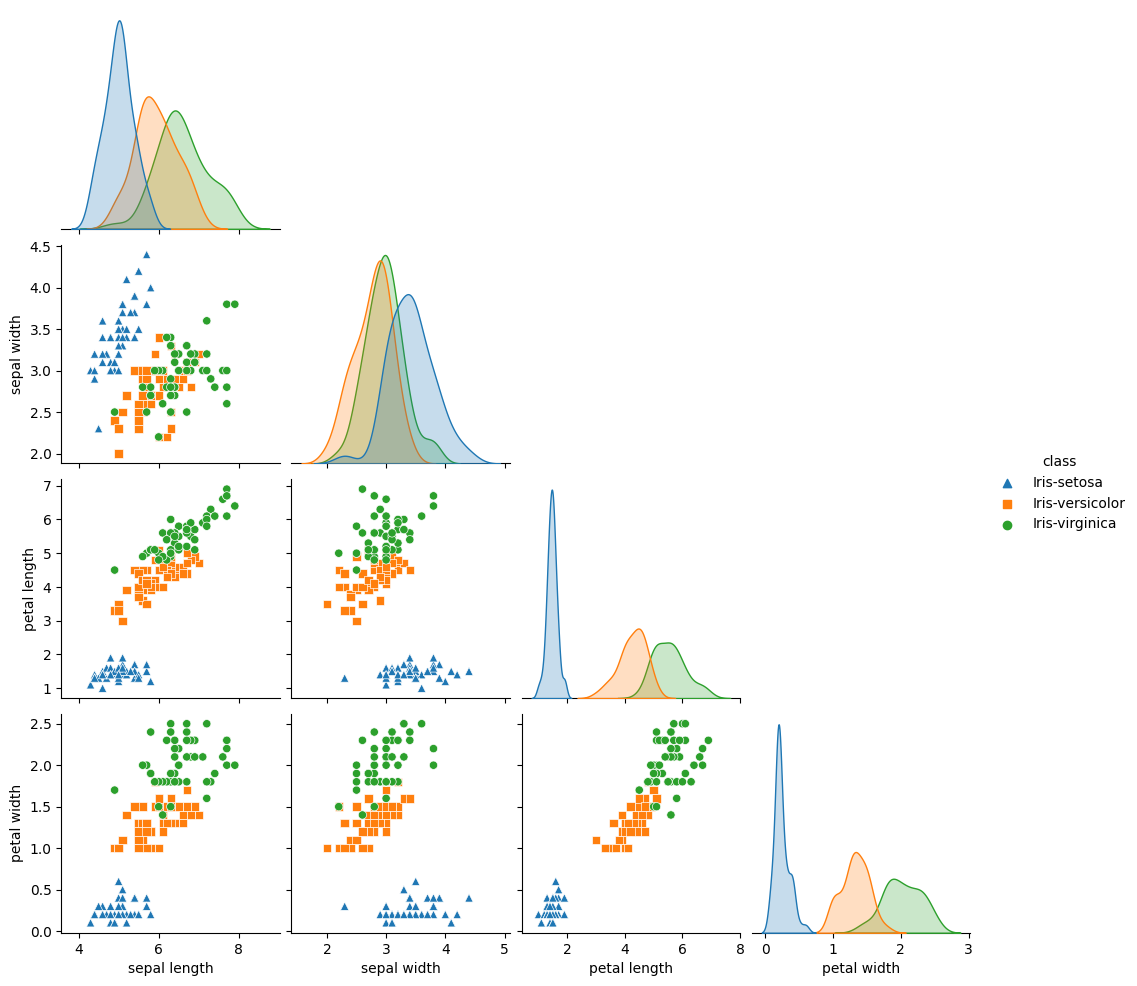

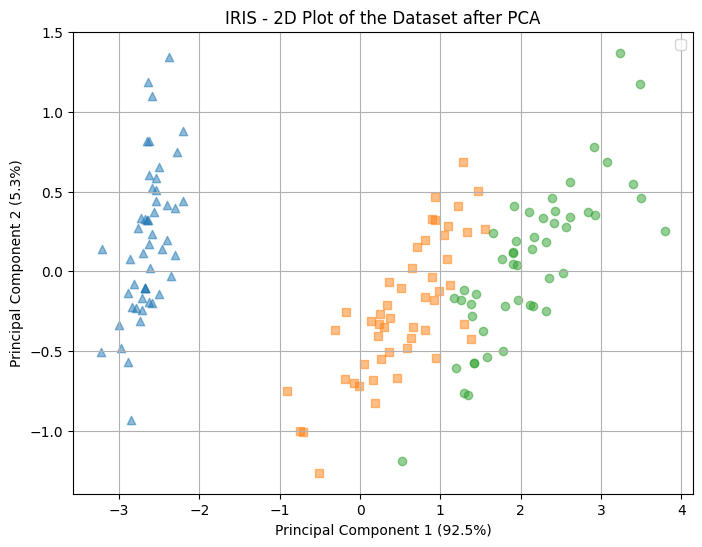

In [14]:
# fetch dataset - IRIS
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets

label_column_nm = y.columns[0]
labels_encoder = LabelEncoder()
numeric_labels = labels_encoder.fit_transform(y[label_column_nm])

markers = ['^', 's', 'o']
plotting(X, y, ds_name="IRIS", matrix_plot=True, markers=markers)

# Normalization
scaler = MinMaxScaler((0,1))
X = pd.DataFrame(scaler.fit_transform(X))

## Traditional ECM

[1, 15.042913072547183]
[2, 6.113790048456435]
[3, 4.385054199310874]
[4, 3.8553077938638234]
[5, 3.630377823833048]
[6, 3.5436626002833407]
[7, 3.512398162569874]
[8, 3.5013456937516234]
[9, 3.4970688215587358]
[10, 3.4951704181912464]
[11, 3.4942117597694695]
[0.         3.49421176 3.49421176]
[1, 11.684982313918526]
[2, 6.93645338774156]
[3, 4.247044054173948]
[4, 3.7958169911006276]
[5, 3.7192967480685035]
[6, 3.6654162823672527]
[7, 3.625289599050153]
[8, 3.596612508601562]
[9, 3.5760531744605917]
[10, 3.560805394596144]
[11, 3.5490054503181394]
[12, 3.539478495584732]
[13, 3.5314904474486446]
[14, 3.5246008466098777]
[15, 3.5185638947091435]
[16, 3.5132595972551437]
[17, 3.5086471753934094]
[18, 3.504727610024784]
[19, 3.5015073699637025]
[20, 3.498967845723287]
[21, 3.49705083696804]
[22, 3.495663847611687]
[23, 3.494697996714287]
[1.         3.494698   3.49421176]
[1, 10.590197658288252]
[2, 8.277350405075664]
[3, 7.275155204766994]
[4, 4.96313109647736]
[5, 3.9729722818639854]

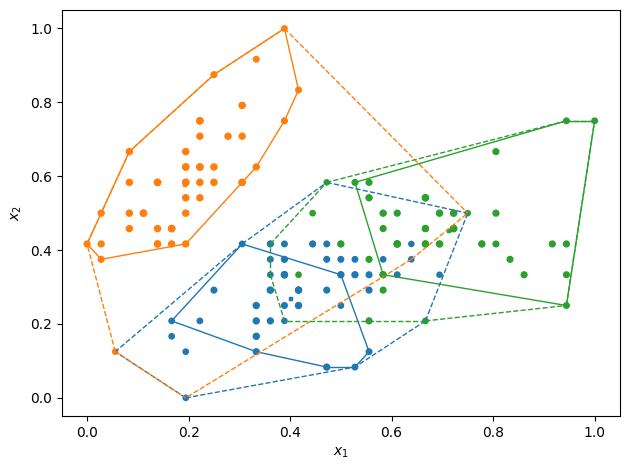

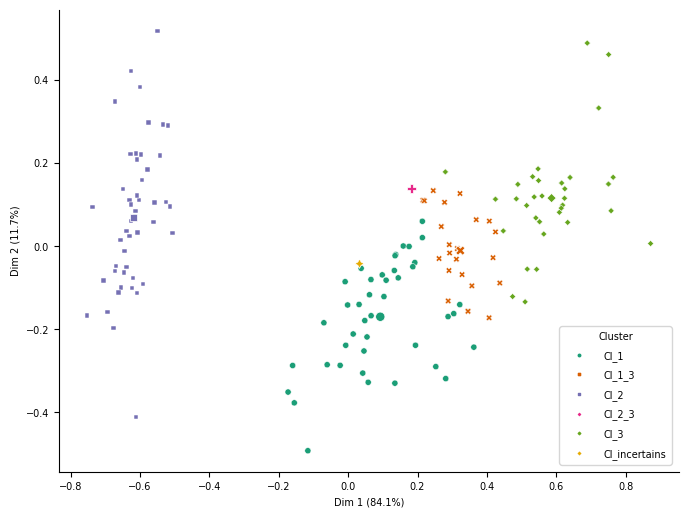

In [20]:
# Traditional ECM clustering
delta = np.sqrt(20)
model_list = np.array([])
for i in range(10):
    model = ecm(x=X, c=3, beta=2, alpha=1, delta=delta, ntrials=10, init="non")
    model_list = np.append(model_list, model)

model_list = sorted(model_list, key=lambda x : x['crit'])
# ARIs
true_labels = numeric_labels
predicted_labels_list = list(map(lambda model: np.argmax(model['betp'], axis=1), model_list))
ari_list = [adjusted_rand_score(true_labels, predicted_labels) for predicted_labels in predicted_labels_list]

# Non-specificity values of top 10
top_NS = [calculate_non_specificity(model, verbose=False) for model in model_list]

# Normalize mutual infor scores
NMIs = [normalized_mutual_info_score(true_labels, predicted_labels) for predicted_labels in predicted_labels_list]

print(f"J values: {[x['crit'] for x in model_list]}")
print(f"ARI values: {ari_list}")
print(f"NS values: {top_NS}")
print(f"NMI values: {NMIs}")
print(f"Average ARI values: {np.mean(ari_list)}")
print(f"Average Non-specificity: {np.mean(top_NS)}")
print(f"Average Normalized mutual infor: {np.mean(NMIs)}")

# Plotting the the model with the minimum J value
ev_plot(model_list[0], X=X, cex=20)
ev_pcaplot(data=X, x=model_list[0], normalize=False, cex=20)


## Weighted ECM (WECM)

In [23]:
# Weighted ECM clustering
model_list = np.array([])
c = 3
d = X.shape[1]
for i in range(10):
    W = np.ones((c, d)) * (1/d)
    g0 = None
    delta = np.sqrt(20)
    model = wecm(x=X, c=c, g0=g0, W=W, beta=2, alpha=1, delta=delta, epsi=1e-3, ntrials=10, init="non")
    model_list = np.append(model_list, model)

# ARIs
true_labels = numeric_labels
predicted_labels_list = list(map(lambda model: np.argmax(model['betp'], axis=1), model_list))
ari_list = [adjusted_rand_score(true_labels, predicted_labels) for predicted_labels in predicted_labels_list]

# Non-specificity values of top 10
top_NS = [calculate_non_specificity(model, verbose=False) for model in model_list]

# Normalize mutual infor scores
NMIs = [normalized_mutual_info_score(true_labels, predicted_labels) for predicted_labels in predicted_labels_list]

print(f"J values: {[x['crit'] for x in model_list]}")
print(f"ARI values: {ari_list}")
print(f"NS values: {top_NS}")
print(f"NMI values: {NMIs}")
print(f"Average ARI values: {np.mean(ari_list)}")
print(f"Average Non-specificity: {np.mean(top_NS)}")
print(f"Average Normalized mutual infor: {np.mean(NMIs)}")


Initial weights: 
 [[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]]
---------Iteration #1---------
Initial prototypes: 
 [[0.62362219 0.53082082 0.77413703 1.04445623]
 [0.50883384 0.38341812 0.7345115  0.68906756]
 [0.3864036  0.33339672 0.38944157 0.50659802]]
[1, 0.6541470690458293]
[2, 0.4040187753697469]
[3, 0.2371125476708362]
[4, 0.22351980052950796]
[5, 0.2222901843139157]
[6, 0.22163742118143354]
[0.         0.22163742 0.22163742]
---------End Iteration #1---------
---------Iteration #2---------
Initial prototypes: 
 [[0.41792953 0.16124858 0.65259459 0.5559275 ]
 [0.61954961 0.38826143 0.47443913 0.78194081]
 [0.46029526 0.51206242 0.88042259 0.60437127]]
[1, 0.7509125015487724]
[2, 0.5240655754833544]
[3, 0.45494908161346287]
[4, 0.28261003915668487]
[5, 0.23810018097469407]
[6, 0.22815075567774887]
[7, 0.22362450283753268]
[8, 0.2217506095517272]
[9, 0.2209112107095929]
[1.         0.22091121 0.22091121]
---------End Iteration #2---------
---------Itera

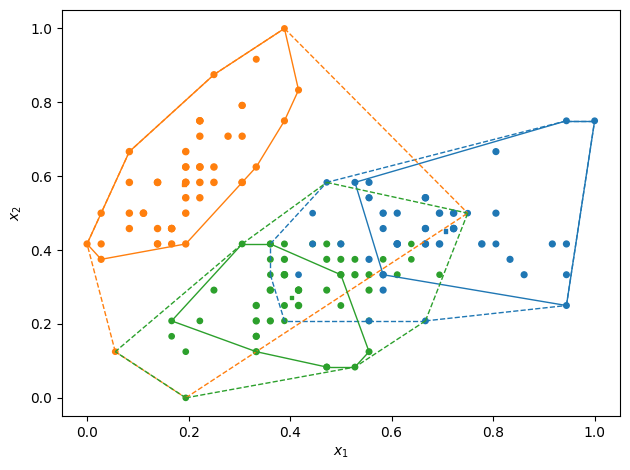

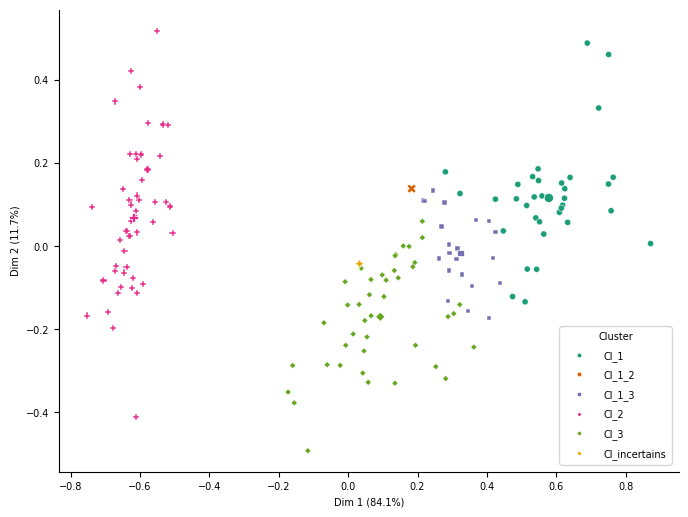

In [24]:
# Plotting PCA of the best model
ev_plot(model_list[0], X=X, cex=20)
ev_pcaplot(data=X, x=model_list[0], normalize=False, cex=20)